In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 가져오기. 이걸 굳이 외워야하나 싶어서 걍 긁어왔다. 이걸 외워서 쓸 수 있냐 여부로 나의 개발 실력이 갈릴거라는 생각이 들지 않는다. 
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# 일반화 작업도 해줘야한다. 해주고 안해주고 차이가 너무 크더라
training_images = training_images / 255 
test_images = test_images / 255

training_images = np.expand_dims(training_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
# print(np.shape(training_images)) # 이미지 사이즈가 28*28임을 알 수 있다. 
# print(np.shape(test_images)) # 이미지 사이즈가 28*28임을 알 수 있다. 

In [3]:
# 모델 생성. 모델 쌓는 순서는 합성곱 -> 풀링 -> 합성곱 -> 풀링 -> flatten() -> Dense Layer 
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, 3, activation='relu' ,input_shape = (28, 28, 1))) # 사용할 커널 개수는? 커널 크기는? 입력 모양은? 활성화 함수는?
model.add(keras.layers.MaxPooling2D(2,2)) # 풀링 크기는? 
model.add(keras.layers.Conv2D(128, 3, activation='relu')) # 사용할 커널 개수는? 커널 크기는? 입력 모양은?
model.add(keras.layers.MaxPooling2D(2,2)) # 풀링 크기는? 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 컴파일 함수. 원-핫-인코딩인 경우 손실 함수로 sparse_categorical_crossentropy을 써주면 좋다. 

In [ ]:
# 이거 갖다쓰자. 얘도 외워야하나..?
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
# 훈련시키기 
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels), verbose=1, callbacks=[callbacks]) # validation_data이 있으면 매 에포크마다 검증한다.
# 모델을 훈련시키는 이유가 무엇인가? 규칙을 얻기 위함이다.
# 규칙을 알려면 필요한게 뭔가? 바로 입력값, 출력값이다. 
# 규칙을 알기 위해 무엇을 해야하나? 훈련을 해야한다. 얼마나?
# 모델의 성능이 어떠한지 궁금하다. 궁금하면 어떻게 해야하는가?
# 훈련 진행상황을 눈으로 보고싶다. verbose 설정

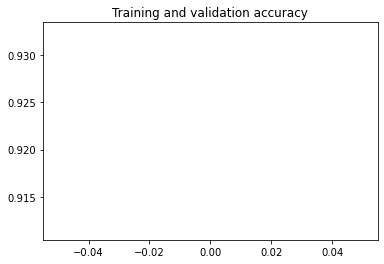

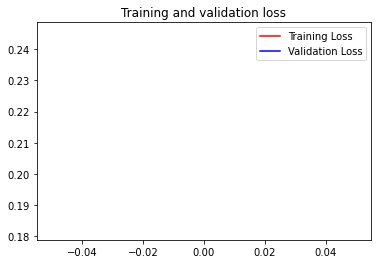

In [27]:
# 그래프 그리기. 이것도 갖다쓰자. 갖다 쓰다보면 외워지겠지?

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()